In [26]:
%run Data_Preprocessing.ipynb

0.23.1


In [27]:
from sklearn import neighbors, linear_model

df_new=sample_data()
trX,teX,trY,teY=make_test_train(df_new)


In [28]:
#balance test
np.sum(df_new['stalt']==0)/df_new.shape[0]

0.5171583383503914

## Logistic Regression with stat model -- get p value

In [29]:
import statsmodels.api as sm

logit=sm.Logit(trY,trX)
model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.371419
         Iterations 7


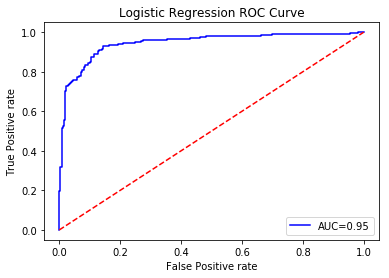

Accuracy score 0.883768
AUC score 0.945431
ks statistic 0.786050


In [30]:
auc_score,accuracy_score,ks=calc_metrics(model,teX,teY,0.5,0)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [31]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1162
Model:                          Logit   Df Residuals:                     1154
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                  0.4637
Time:                        22:51:53   Log-Likelihood:                -431.59
converged:                       True   LL-Null:                       -804.75
                                        LLR p-value:                7.081e-157
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
prcc_f                          -0.7750      0.058    -13.319      0.000      -0.889      -0.661
at                               0.1542      0.037      4.218      0.000     

## Logistic Regression with sklearn

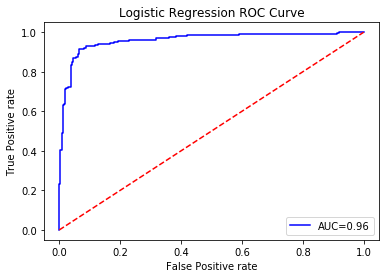

Accuracy score 0.909820
AUC score 0.960131
ks statistic 0.846972


In [32]:
logistic=linear_model.LogisticRegression(penalty='l2',tol=0.0001,C=1000,max_iter=1000,random_state=random_state).fit(trX,trY)
auc_score,accuracy_score,ks=calc_metrics(logistic,teX,teY,0.5,1)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [33]:
#sklearn accuracy
logistic.score(teX,teY)

0.9098196392785571

In [34]:
logistic.score(trX,trY)

0.8691910499139415

In [35]:
logistic.intercept_

array([-8.81395351])

In [36]:
logistic.coef_

array([[-1.00095034e+00,  3.68424621e-01, -9.50461872e-02,
        -1.82820397e-03, -6.01680133e-02,  2.06532993e+01,
         1.12465875e+01,  7.81076140e+01]])